# Step 1 : Importing all necessary libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


## Step 2: Data Gathering 
### Loading the dataset

In [22]:
df= pd.read_csv("Warehouse_and_Retail_Sales.csv")

In [23]:
df.shape

(307645, 9)

- shape of the dataset and I found there are 307645 rows and 9 columns

In [24]:
df.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

In [25]:
df.head(10)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
5,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,2.76,0.0,6.0
6,2020,1,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.08,1.0,1.0
7,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,1008,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...,BEER,0.00,0.0,2.0
8,2020,1,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,6.41,4.0,0.0
9,2020,1,INTERNATIONAL CELLARS LLC,101117,KSARA CAB - 750ML,WINE,0.33,1.0,2.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [27]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


## Step 3: Data Preprocessing
####  Finding Missing Value 

In [28]:
# Missing Value Count
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

- The dataset contains missing values in the following columns: SUPPLIER (167), ITEM TYPE (1), and RETAIL SALES (3), while all other columns have complete data.

####  Data Cleaning

In [29]:
missing_data_rows = df[df[['SUPPLIER', 'ITEM TYPE', 'RETAIL SALES']].isnull().any(axis=1)]

In [30]:
missing_data_rows

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
106,2020,1,NaN,107,JIGGER MEASURE SHOT GLASS,STR_SUPPLIES,14.69,18.0,0.0
188,2020,1,NaN,113,BARTENDERS BLACK BOOK,STR_SUPPLIES,0.40,0.0,0.0
231,2020,1,NaN,115,PLASTIC SHOT GLASS PACK,STR_SUPPLIES,5.71,6.0,0.0
252,2020,1,NaN,117,WHISKEY TASTING JOURNAL,STR_SUPPLIES,0.08,0.0,0.0
261,2020,1,NaN,118,PLASTIC WINE GLASS PACK,STR_SUPPLIES,7.40,10.0,0.0
...,...,...,...,...,...,...,...,...,...
306784,2020,9,NaN,4,RMS ITEM,NON-ALCOHOL,NaN,0.0,0.0
307259,2020,9,NaN,118,PLASTIC WINE GLASS PACK,STR_SUPPLIES,5.20,0.0,0.0
307304,2020,9,NaN,107,JIGGER MEASURE SHOT GLASS,STR_SUPPLIES,8.62,16.0,0.0
307601,2020,9,NaN,WC,WINE CREDIT,REF,0.00,0.0,-70.0


- SUPPLIER → Missing values are shown as NaN (167 values missing)
- ITEM TYPE → Missing values are shown as REF(1 value missing)
- RETAIL SALES → Missing values are shown as NaN (3 values missing)


In [31]:
df['SUPPLIER'].value_counts().head(5)

SUPPLIER
REPUBLIC NATIONAL DISTRIBUTING CO       20995
LEGENDS LTD                             13634
SOUTHERN GLAZERS WINE AND SPIRITS       11720
E & J GALLO WINERY                      10816
THE COUNTRY VINTNER, LLC DBA WINEBOW    10669
Name: count, dtype: int64

In [32]:
df["SUPPLIER"] = df["SUPPLIER"].fillna(df["SUPPLIER"].mode()[0])


- To handle missing values in the SUPPLIER column, we replaced them with the most frequently occurring value (mode). This ensures consistency in the dataset without losing important information.

In [33]:
df['ITEM TYPE'].value_counts().head(5)

ITEM TYPE
WINE           187640
LIQUOR          64910
BEER            42413
KEGS            10146
NON-ALCOHOL      1908
Name: count, dtype: int64

In [34]:
df["ITEM TYPE"] = df["ITEM TYPE"].fillna(df["ITEM TYPE"].mode()[0])

- Missing values in ITEM TYPE were replaced with the most frequent category (most_common_value) using mode, ensuring no RFF values remain.   


In [35]:
df['RETAIL SALES'].value_counts().head(5)

RETAIL SALES
0.00    121702
0.08     10664
0.17      6819
0.16      6091
0.24      3921
Name: count, dtype: int64

In [36]:
df["RETAIL SALES"] = df["RETAIL SALES"].fillna(df["RETAIL SALES"].median())


- To handle missing values in the RETAIL SALES column, we replaced them with the median value of the column. The median is used instead of the mean to prevent the influence of outliers.

In [37]:
# Missing Value Count
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [38]:
# If "ITEM CODE" or any other unused column is present, remove it
columns_to_drop = ["ITEM CODE"]
df = df.drop(columns=columns_to_drop)

print("Unnecessary columns have been removed!")


Unnecessary columns have been removed!


- Removing Unused Columns
- To clean the dataset, unnecessary columns like ITEM CODE have been removed to retain only the relevant data.

In [39]:
df.duplicated().sum()

np.int64(14)

- Checking for the duplicates present in the dataset and found that 14 duplicates value in the dataset. I have cleared the duplicates by using drop_duplicates function.

In [40]:
df.drop_duplicates(inplace=True)

In [41]:
df.duplicated().sum()

np.int64(0)

## Step 4 : Exploratory Data Analysis (EDA)


## Data Visualization 

####   Box Plot 

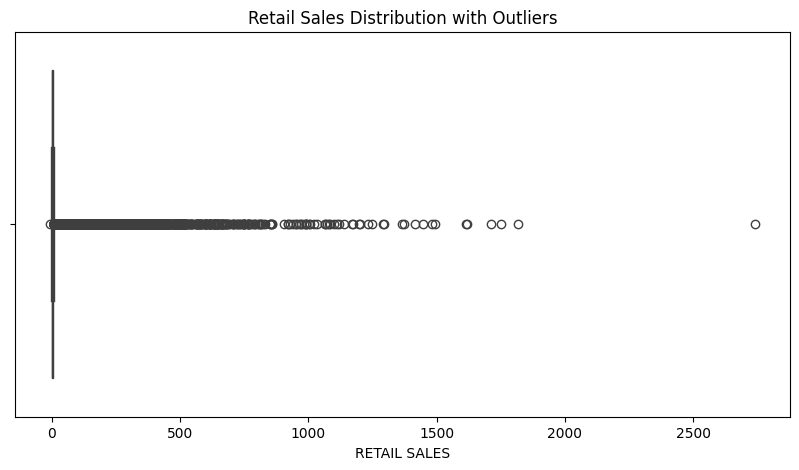

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["RETAIL SALES"])
plt.title("Retail Sales Distribution with Outliers")
plt.show()

- The majority of retail sales values are concentrated near the lower range.
- A long right whisker and multiple individual points indicate **positive skewness**, meaning some transactions have exceptionally high sales.
- The presence of numerous **outliers** (marked as individual circles) suggests extreme variations in sales, which could be due to high-value transactions or data anomalies.

In [43]:
from scipy import stats

# Remove outliers using Z-Score
df = df[(stats.zscore(df["RETAIL SALES"]) < 3)]  # Keep Z-Score < 3

print("Outliers have been removed!")


Outliers have been removed!


- Outliers in RETAIL SALES were removed using the Z-score method (threshold = 3), retaining only statistically normal data for better analysis.  


####  Histogram 

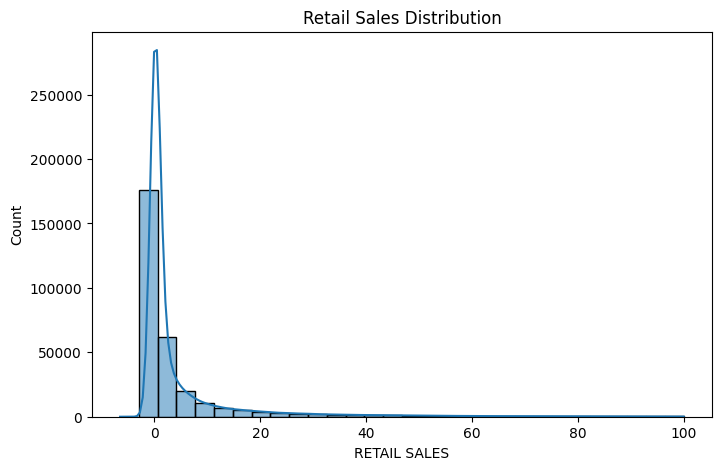

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(df["RETAIL SALES"], kde=True, bins=30)
plt.title("Retail Sales Distribution")
plt.show()


-->The histogram below shows the distribution of RETAIL SALES with a kernel density estimate (KDE) curve.

- The distribution is "right-skewed", indicating that most sales values are low, with a few high-value transactions.
- A sharp peak near zero suggests a high frequency of small sales amounts.
- The "KDE (Kernel Density Estimate) curve" confirms the skewness, showing a long tail towards higher values.

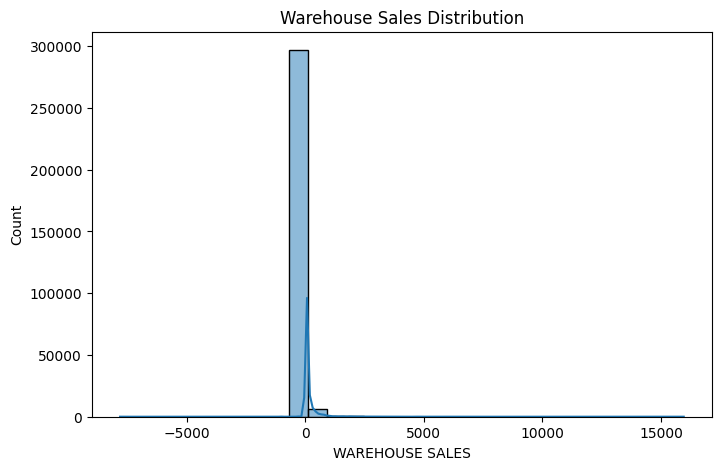

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(df["WAREHOUSE SALES"], kde=True, bins=30)
plt.title("Warehouse Sales Distribution")
plt.show()


- Highly Skewed Data: The histogram shows that most warehouse sales values are clustered around zero.  
- Potential Outliers: There are a few extreme values (both negative and positive), which may be outliers.  
- Density Estimation: The KDE (Kernel Density Estimation) curve indicates a sharp central peak, but some extreme points suggest data variability.
- Normalizing or applying a log transformation can make the distribution more interpretable.  
- Outliers should be detected and handled to improve the accuracy of clustering and analysis.  
- Adjusting the number of bins might provide a clearer visualization of data distribution.  


In [46]:
df["WAREHOUSE SALES"].describe()

count    304260.000000
mean         17.463689
std         149.915694
min       -7800.000000
25%           0.000000
50%           1.000000
75%           5.000000
max       15955.460000
Name: WAREHOUSE SALES, dtype: float64

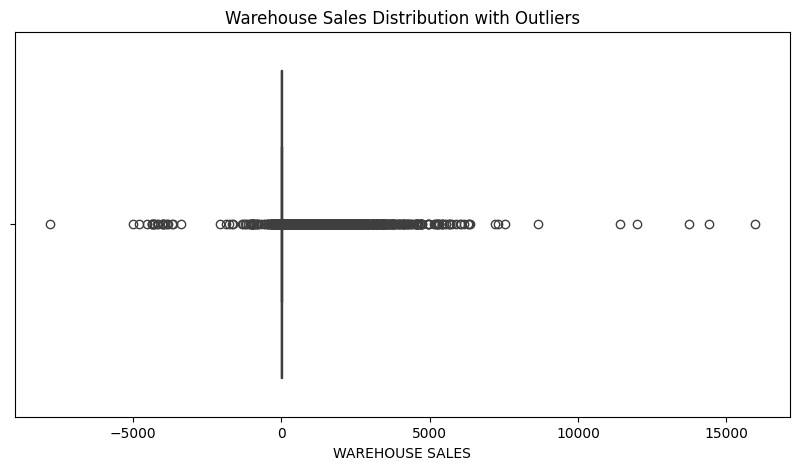

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["WAREHOUSE SALES"])
plt.title("Warehouse Sales Distribution with Outliers")
plt.show()

- Presence of Outliers: The box plot reveals a significant number of outliers on both the negative and positive sides.  
- Highly Concentrated Data : Most sales values are densely packed around zero, with a few extreme values deviating significantly.  
- Potential Data Issues : The presence of extreme negative values suggests possible data entry errors or returns, which should be investigated.  


In [48]:
# Remove outliers using Z-Score
df = df[(stats.zscore(df["WAREHOUSE SALES"]) < 3)]  # Keep Z-Score < 3

print("Outliers have been removed!")


Outliers have been removed!


- Same remove for Outliers in Warehouse sales were removed using the Z-score method (threshold = 3), retaining only statistically normal data for better analysis.  


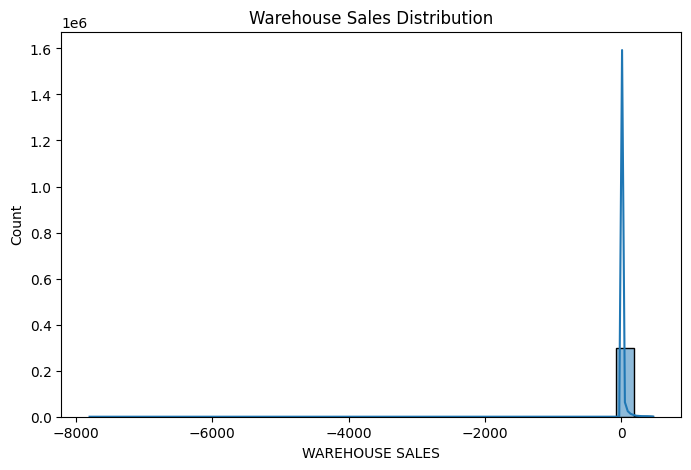

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(df["WAREHOUSE SALES"], kde=True, bins=30)
plt.title("Warehouse Sales Distribution")
plt.show()


####  Bar Chart

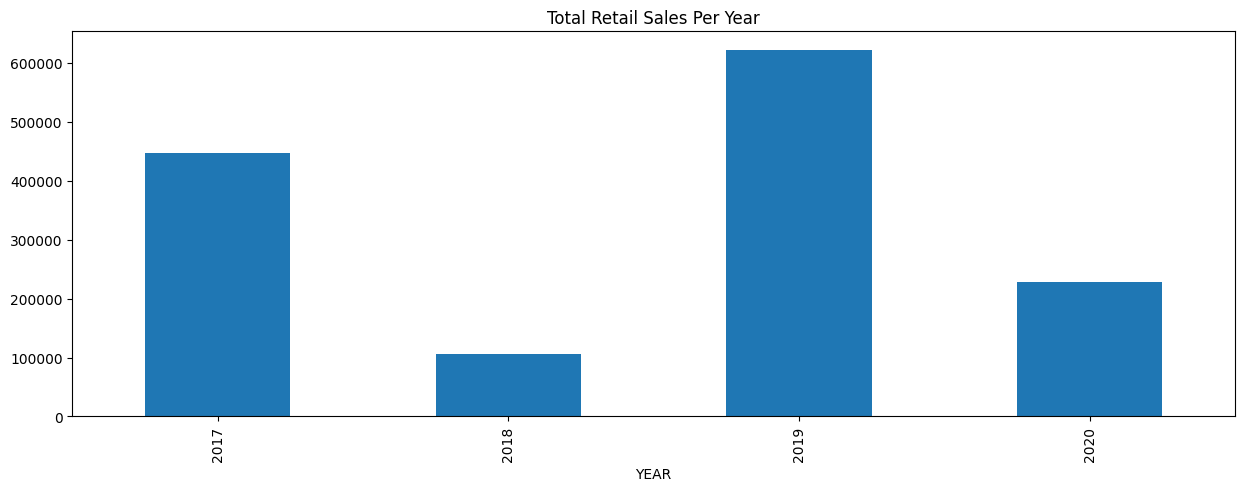

In [50]:
df.groupby("YEAR")["RETAIL SALES"].sum().plot(kind="bar", figsize=(15,5))
plt.title("Total Retail Sales Per Year")
plt.show()


- Retail sales vary significantly across the years, with notable peaks and dips.  
- The year 2019 recorded the highest total retail sales, indicating strong business performance.  
- There is a sharp decline in sales in 2018, which might be due to external factors such as economic conditions, inventory issues, or demand fluctuations.  
- While sales in 2020 are lower than in 2019, they show an improvement compared to 2018. 

--> Possible Insights:  
- Investigate the reasons behind the sales drop in 2018 and the peak in 2019.  
- Analyze external factors such as market trends, economic conditions, or business strategies that influenced sales performance.  
- Further breakdown sales data by product category or region to understand contributing factors.  


####  Horizontal Bar Chart

Item Wise Count 

ITEM TYPE
WINE            186924
LIQUOR           63562
BEER             39254
KEGS             10122
NON-ALCOHOL       1874
STR_SUPPLIES       404
REF                127
DUNNAGE             95
Name: count, dtype: int64


Text(0.5, 0, 'Item Type')

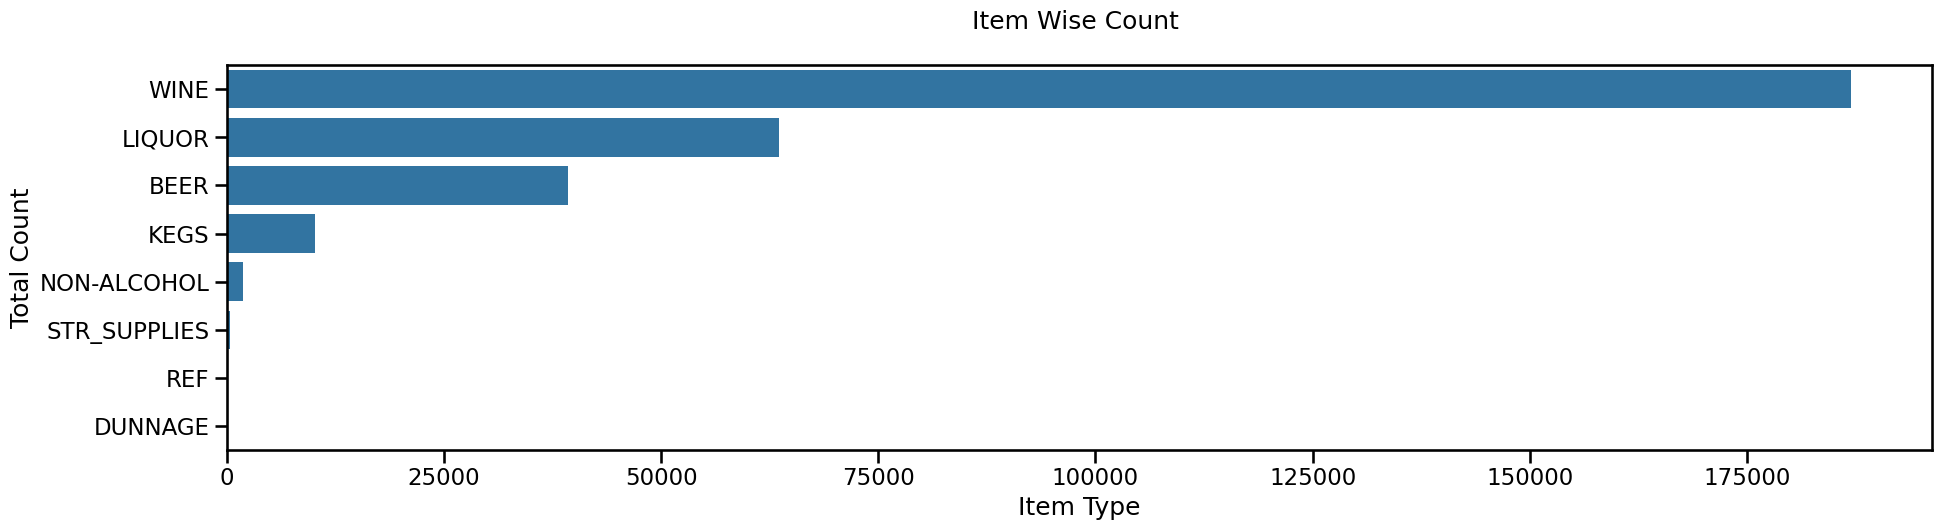

In [51]:
# Item wise count
df = df.dropna()
ItemCount = df["ITEM TYPE"].value_counts().nlargest(10)
print("Item Wise Count \n")
print(ItemCount)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,5))
sns.countplot(df['ITEM TYPE'],order = df ['ITEM TYPE'].value_counts().index)
plt.title('Item Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Item Type')

#### Top 5 Item  Pie chart

Text(0, 0.5, 'Item')

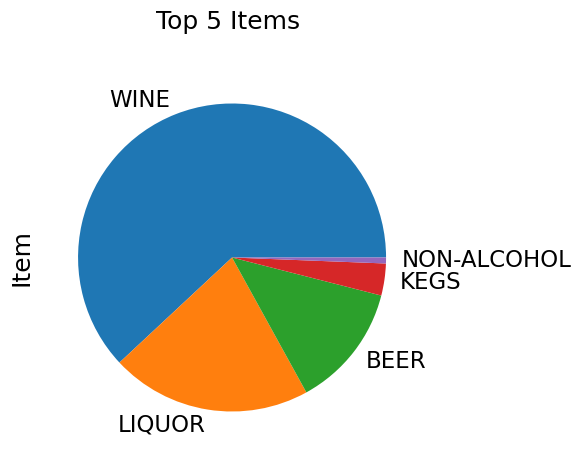

In [52]:
# Draw Pie Chart
plt.figure(figsize=(6,5))
df['ITEM TYPE'].value_counts().nlargest(5).plot(kind='pie')
plt.title('Top 5 Items \n')
plt.ylabel('Item')

--> Item-Wise Sales Analysis
- The horizontal bar chart and pie chart highlight the top-selling item categories.

- Wine is the most sold item, followed by Liquor and Beer.

- Kegs and Non-Alcoholic beverages contribute to a smaller proportion of total sales.

- The pie chart visually confirms that wine dominates sales volume.

In [53]:
# Find Unique Field Value
UniqueItem = df ['ITEM TYPE'].unique()
print("All Unique Items \n")
print(UniqueItem)

All Unique Items 

['WINE' 'BEER' 'LIQUOR' 'STR_SUPPLIES' 'KEGS' 'REF' 'DUNNAGE'
 'NON-ALCOHOL']


In [54]:
# Item Wise Summary. 
# We will take Wine Iteam as example
ItemData=df[df['ITEM TYPE']=='WINE']
print ("The Max Wine Retail Transfers is :",ItemData['RETAIL TRANSFERS'].max())
print ("The Min Wine Retail Transfers is :",ItemData['RETAIL TRANSFERS'].min())
ItemTypeMean = ItemData['RETAIL TRANSFERS'].mean()
print ("The Mean Wine Retail Transfers is :", round(ItemTypeMean,2))

The Max Wine Retail Transfers is : 206.92
The Min Wine Retail Transfers is : -8.67
The Mean Wine Retail Transfers is : 3.37


Text(0.5, 0, 'Item Type')

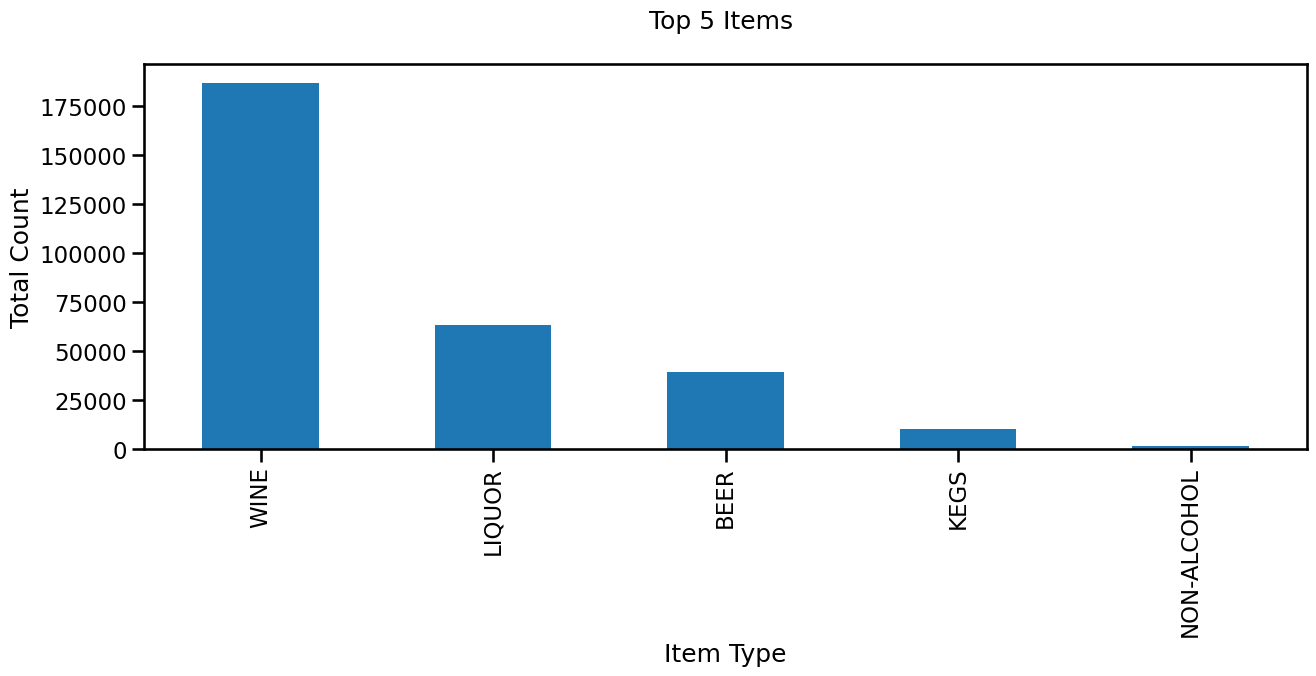

In [55]:
# Top 5 Items in Bar Chart
plt.figure(figsize=(15,5))
GraphData=df.groupby('ITEM TYPE').size().nlargest(5)
GraphData.plot(kind='bar')
plt.title('Top 5 Items \n')
plt.ylabel('Total Count')
plt.xlabel('Item Type')

--> Wine Retail Transfers Statistics
- The max wine retail transfer value is 206.92, while the minimum is -8.67, possibly indicating returns or losses.
- The mean wine retail transfer value is 3.37, suggesting that on average, wine transactions remain positive but relatively low per instance.
- The bar chart represents the total count of the top 5 selling item categories.
- Wine is the most frequently sold item, with a significantly higher count than other items.

#### Top 5 Supplieies in Bar Chart

SUPPLIER
REPUBLIC NATIONAL DISTRIBUTING CO       21145
LEGENDS LTD                             13630
SOUTHERN GLAZERS WINE AND SPIRITS       11682
THE COUNTRY VINTNER, LLC DBA WINEBOW    10668
E & J GALLO WINERY                      10658
dtype: int64


Text(0.5, 0, 'Supplier Name')

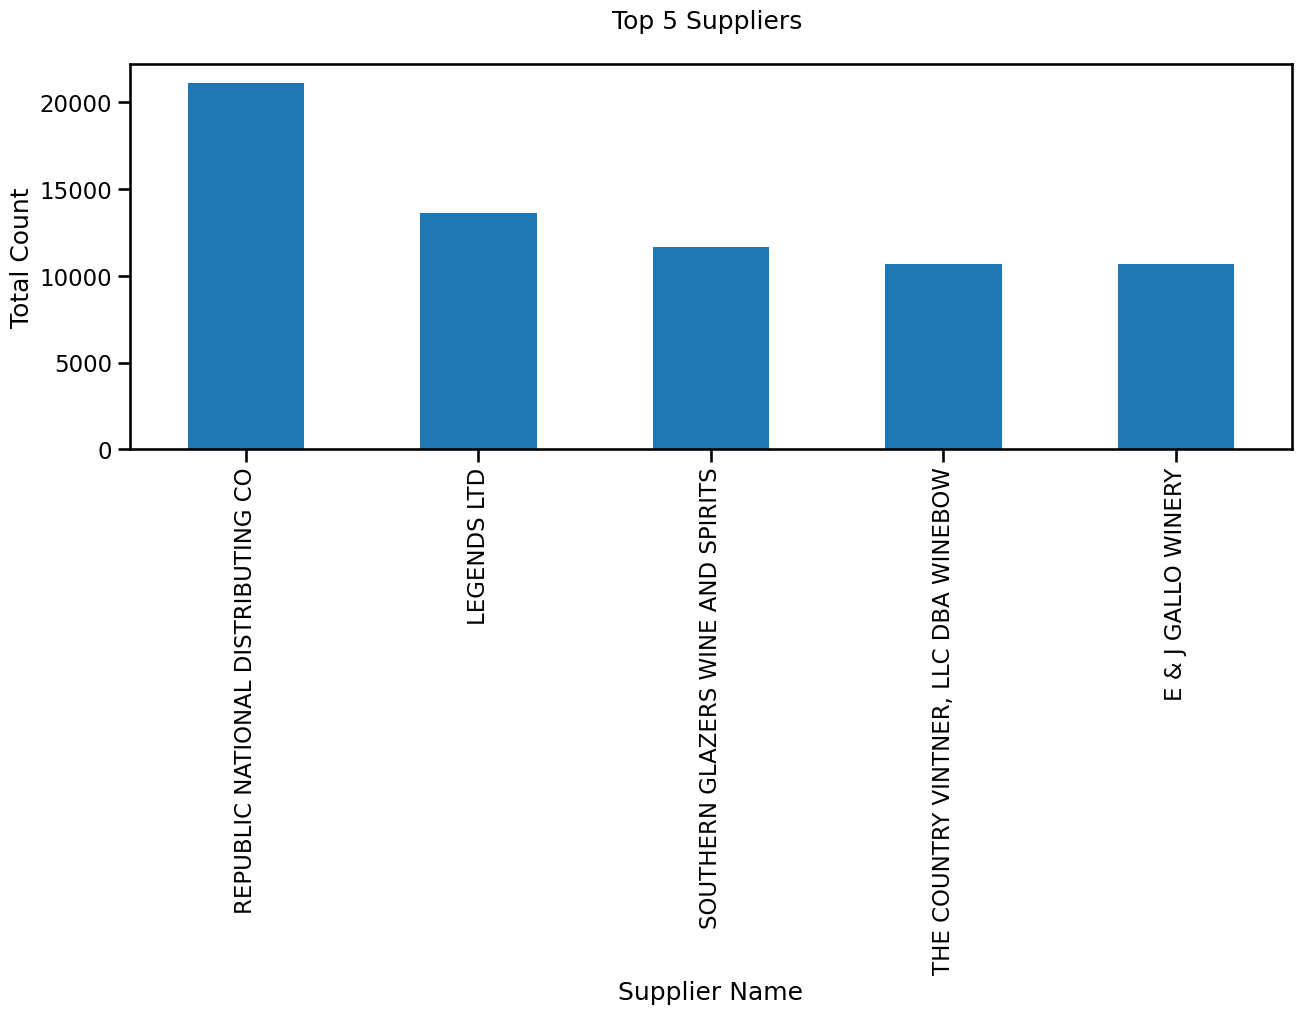

In [56]:
# Top 5 Supplieies in Bar Chart
plt.figure(figsize=(15,5))
TopFiveSupplier=df.groupby('SUPPLIER').size().nlargest(5)
print(TopFiveSupplier)
TopFiveSupplier.plot(kind='bar')
plt.title('Top 5 Suppliers \n')
plt.ylabel('Total Count')
plt.xlabel('Supplier Name')

- The bar chart below displays the Top 5 Suppliers based on the total count of items supplied.
- From the analysis, the top supplier is Republic National Distributing Co, contributing significantly more than the rest. Other notable suppliers include Legends Ltd, Southern Glazers Wine and Spirits, The Country Vintner LLC DBA Winebow, and E & J Gallo Winery.

#### Top 10 Wine Supplieies in Bar Chart

Top 10 Wine Suppliers 

SUPPLIER
REPUBLIC NATIONAL DISTRIBUTING CO       16864
MONSIEUR TOUTON SELECTION               10325
THE COUNTRY VINTNER, LLC DBA WINEBOW    10150
A VINTNERS SELECTIONS                    9186
E & J GALLO WINERY                       9068
SOUTHERN GLAZERS WINE AND SPIRITS        8747
BACCHUS IMPORTERS LTD                    6770
CONSTELLATION BRANDS                     5435
CONSTANTINE WINES INC                    4838
DIONYSOS IMPORTS INC                     3979
Name: count, dtype: int64


Text(0.5, 0, 'Supplier Name')

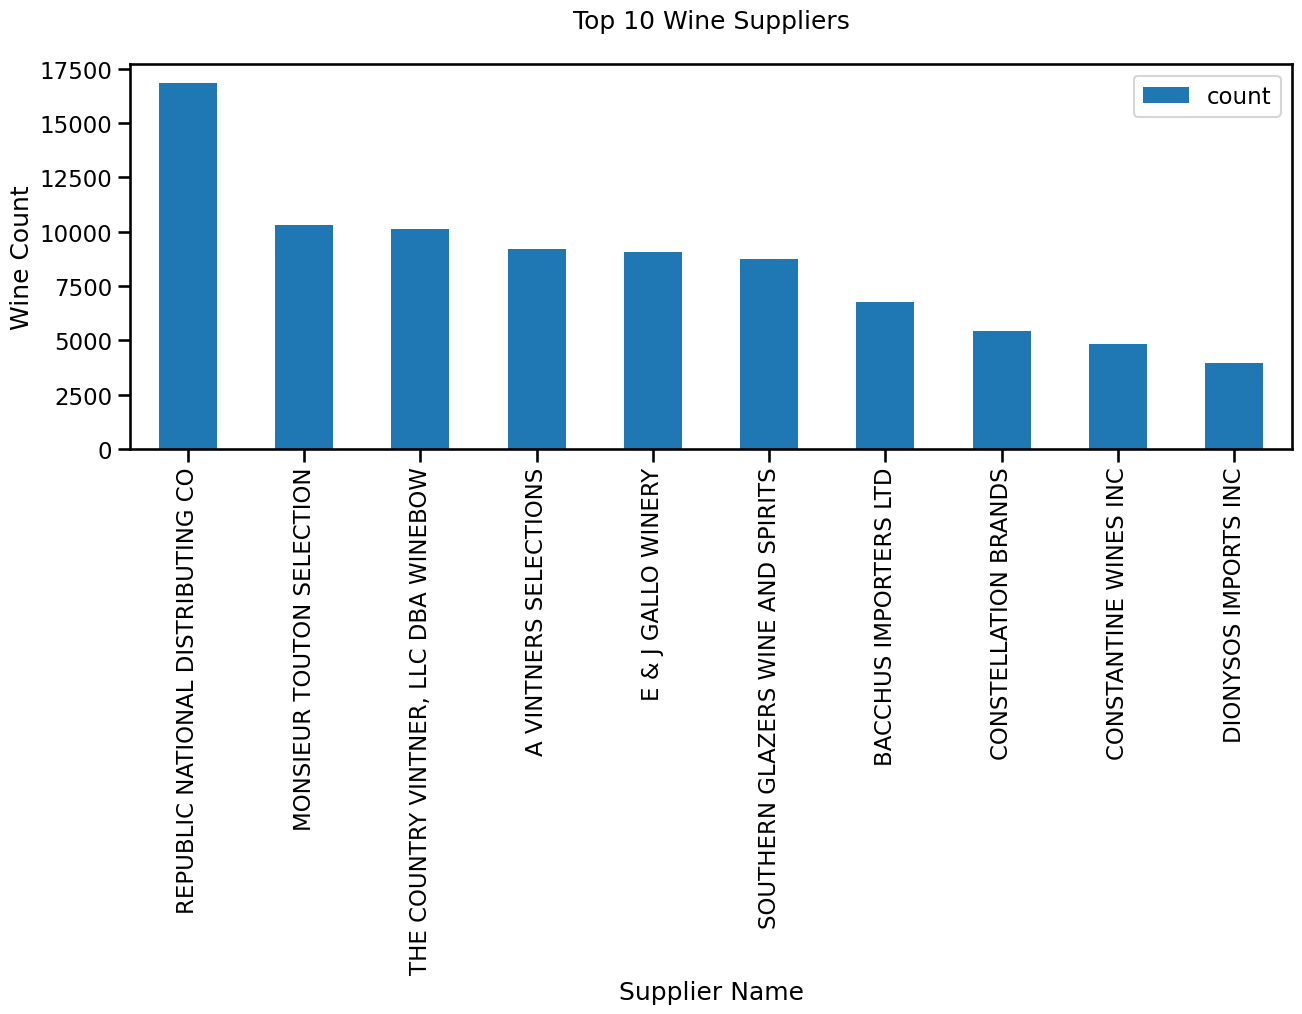

In [57]:
# Top 10 Wine Supplieies in Bar Chart
Item=df[df['ITEM TYPE']=='WINE']
Item[Item["ITEM TYPE"]=='WINE']['SUPPLIER'].value_counts()[0:10].to_frame().plot.bar(figsize=(15,5))
ItemSupplier = Item[Item["ITEM TYPE"]=='WINE']['SUPPLIER'].value_counts()[0:10]
print("Top 10 Wine Suppliers \n")
print(ItemSupplier)
plt.title('Top 10 Wine Suppliers\n')
plt.ylabel('Wine Count')
plt.xlabel('Supplier Name')

- The following bar chart represents the Top 10 Suppliers for Wine.
- The highest supplier remains Republic National Distributing Co, followed by Monsieur Touton Selection, The Country Vintner LLC DBA Winebow, A Vintners Selections, and E & J Gallo Winery. This breakdown helps in understanding the major contributors in the wine supply chain.

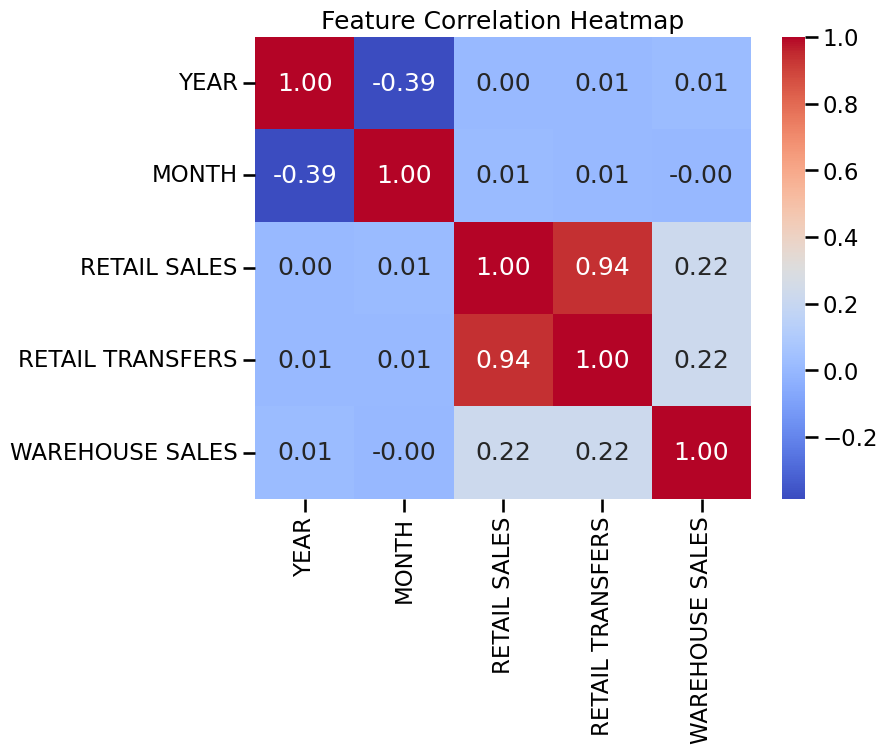

In [58]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

- This heatmap visualizes the correlation between numerical features, showing a **strong positive correlation (0.94) between retail sales and retail transfers**, indicating a direct relationship. The **negative correlation (-0.39) between year and month suggests a seasonal pattern** in the dataset.  

## Step 5 : Scaling using  StandardScaler

- Since sales data had large variations, scaling was applied to normalize values.

- StandardScaler  were used to bring all features to a uniform scale. 



In [59]:
#  Feature Selection (Choosing relevant numerical features for clustering)
features = [ "RETAIL SALES", "RETAIL TRANSFERS", "WAREHOUSE SALES" ]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
finaldf = df[[ "RETAIL SALES", "RETAIL TRANSFERS", "WAREHOUSE SALES"]]

finaldf.head()

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,0.00,0.0,2.0
1,0.00,1.0,4.0
2,0.00,0.0,1.0
3,0.00,0.0,1.0
4,0.82,0.0,0.0


In [61]:
X = finaldf[[ "RETAIL SALES", "RETAIL TRANSFERS", "WAREHOUSE SALES"]].values

- I saved that finaldf dataframe into X variable

## Step 6 : Model Building
### K-Means Clustering Algorithm

- K-means clustering is an unsupervised machine learning algorithm.

- It partitions a dataset into K distinct clusters.

- The objective is to minimize the within-cluster variance.

- Each cluster is represented by its centroid, calculated as the mean of the data points in the cluster.

- The algorithm iteratively assigns data points to the nearest centroid and updates the centroids


In [62]:
def calculate_distortion(X, n_clusters):
    distortions = []
    for i in range(1, n_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    return distortions

In [63]:
def plot_elbow(distortions, n_clusters):
    plt.plot(range(1, n_clusters + 1), distortions, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

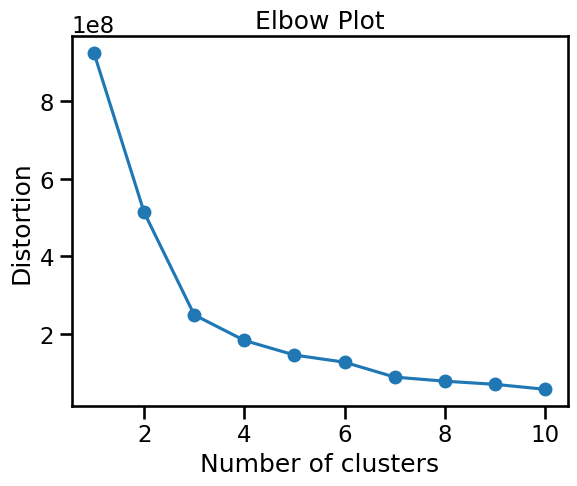

In [64]:
distortions = calculate_distortion(X, n_clusters=10)
plot_elbow(distortions, n_clusters=10)

- Based on the elbow method, 3 appears to be the most suitable number of clusters for the given dataset.

- This insight can guide further analysis and decision-making processes, such as segmenting data into distinct groups for targeted actions or understanding underlying patterns within the data

In [65]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
df['Cluster'] = kmeans.fit_predict(X_scaled)

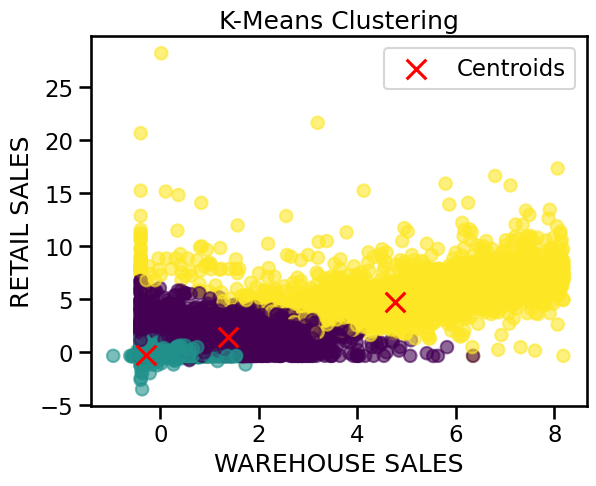

In [66]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x', label="Centroids")
plt.xlabel("WAREHOUSE SALES")
plt.ylabel("RETAIL SALES")
plt.title("K-Means Clustering")
plt.legend()
plt.show()


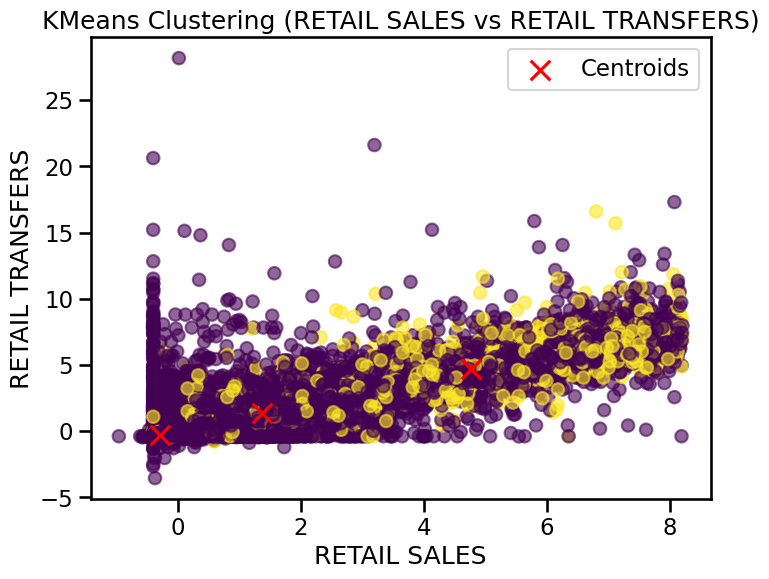

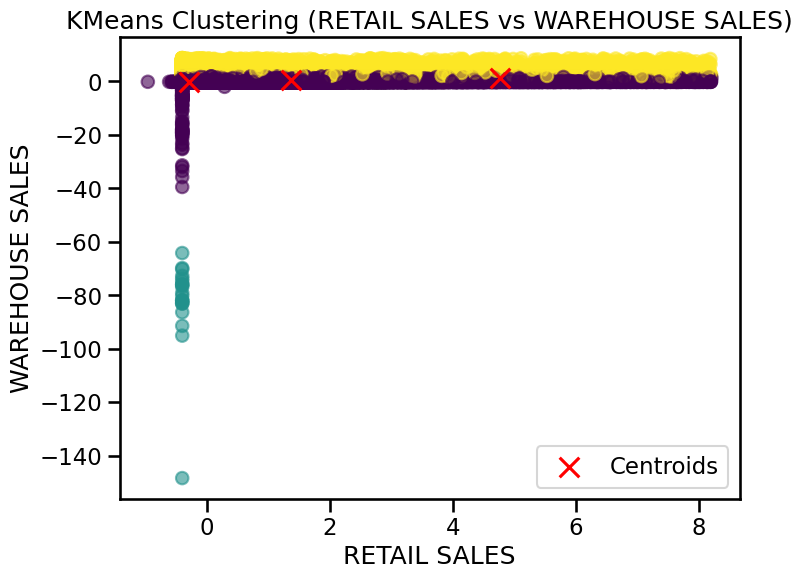

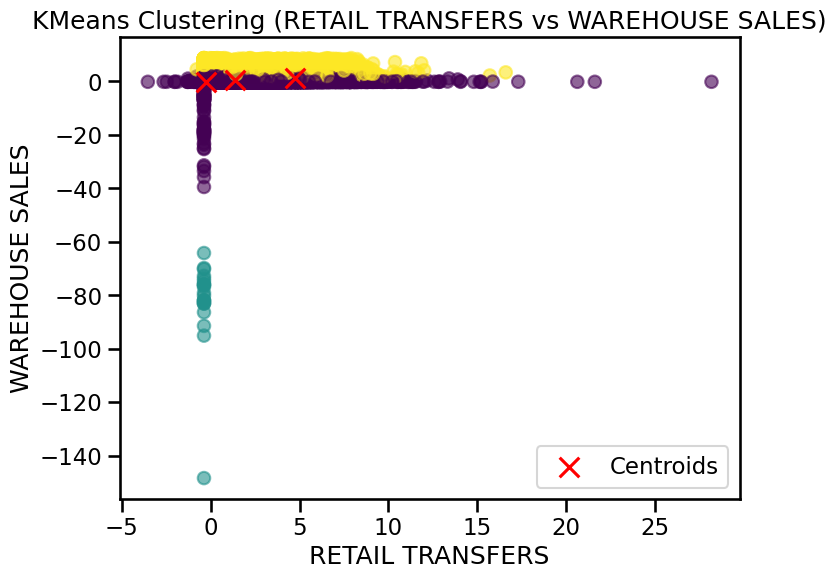

In [67]:
feature_names = ["RETAIL SALES", "RETAIL TRANSFERS", "WAREHOUSE SALES"]
for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        plt.figure(figsize=(8, 6))
        plt.scatter(X_scaled[:, i], X_scaled[:, j], c=labels, cmap='viridis', alpha=0.6)
        plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, j], s=200, c='red', marker='x', label='Centroids')
        plt.title(f'KMeans Clustering ({feature_names[i]} vs {feature_names[j]})')
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.legend()
        plt.show()
